<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Data-Mining/blob/main/Data%20Mining%20Assignment%204/Question%201/PCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Principal Component Analysis

I have used Principal component analysis for dimensionality reduction here. 

The dataset I have used is a classification dataset, which determines whether the given fruit is a orange/grapefruit(target) based on the features given such as 
- diameter 
- weight 
- red 
- green 
- blue


In [1]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%202/DataMining_Datasets/citrus.csv")
X = data[['diameter', 'weight', 'red', 'green', 'blue']]

#data['name'].replace(['orange', 'grapefruit'],
 #                       [0, 1], inplace=True)

y=data.name

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Correlation between different features')

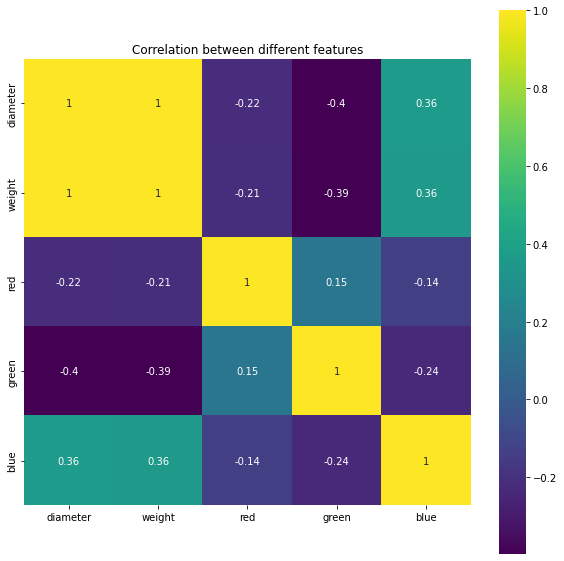

In [14]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different features')

Standardization is performed here.

In [2]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

Computing Eigenvalues and Eigenvectors of covariance matrix

In [3]:
import numpy as np

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00010001  0.9995759  -0.21784248 -0.39687154  0.36334347]
 [ 0.9995759   1.00010001 -0.21473557 -0.39204264  0.35895164]
 [-0.21784248 -0.21473557  1.00010001  0.1489515  -0.13591341]
 [-0.39687154 -0.39204264  0.1489515   1.00010001 -0.24251946]
 [ 0.36334347  0.35895164 -0.13591341 -0.24251946  1.00010001]]


Eigen decomposition on covariance matrix

In [4]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.58583995 -0.70854862 -0.16386792  0.30093281  0.19322826]
 [-0.58424991  0.70564403 -0.16675942  0.30661239  0.19722749]
 [ 0.22951446 -0.00188485 -0.97055652 -0.05595711 -0.04699375]
 [ 0.37396689 -0.00354362  0.03541541  0.15194265  0.91421846]
 [-0.35059304  0.00304007 -0.04587373 -0.88837521  0.29284869]]

Eigenvalues 
[2.55308840e+00 4.98427623e-04 9.14564954e-01 7.86049387e-01
 7.46298879e-01]


In [5]:
#u,s,v = np.linalg.svd(X.T)
#u

Selecting principal components by sorting(rank) eigenvalues from highest to lowest

In [6]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)


print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.5530884023712295
0.9145649543010835
0.786049387116541
0.7462988785932633
0.0004984276228845832


Explained variance to determine how much information is attributed to each of the principal components

In [7]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 51.05666187,  69.34613183,  85.06554747,  99.99003244,
       100.        ])

Selecting top 2 eigen vectors with highest values

In [8]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(5,1),
                      eig_pairs[1][1].reshape(5,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.58583995 -0.16386792]
 [-0.58424991 -0.16675942]
 [ 0.22951446 -0.97055652]
 [ 0.37396689  0.03541541]
 [-0.35059304 -0.04587373]]


Projecting to new feature space

In [9]:
Y = X.dot(matrix_w)

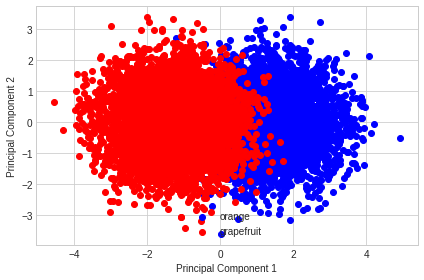

In [10]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('orange', 'grapefruit'), ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

Here I have tried the same, with another PCA implementation technique

In [11]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([0.51056662, 0.1828947 ])

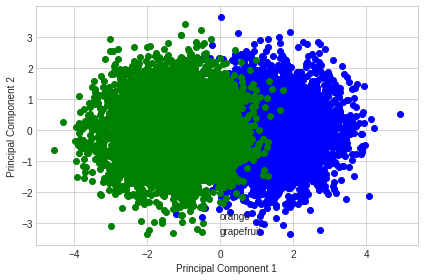

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('orange', 'grapefruit'),
                        ('blue', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()